# Análisis de las peticiones de gobierno abierto

Actualización: Feb. 6, 2019

En esta hoja de trabajo se realiza una análisis de la base de datos de peticiones tramitadas a través del portal Gobierno Abierto.

In [1]:
# Carga de librerías
import pandas as pd
import matplotlib.pyplot as plt
import codecs
import numpy as np
from io import StringIO
%matplotlib inline

In [2]:
raw = codecs.open('listado-de-solicitudes-de-informacion-2014-2018-.csv', 'r', 'iso-8859-1').read()
raw[0:10]

'Siglas,Ins'

In [3]:
# Exploración del dataset
# Los datos son cargados en la variable 'data'
# url = 'https://datos.gob.sv/dataset/91e53b75-02b0-4589-9c59-63bf76731fae/resource/6d423005-1c61-4d98-856a-36b64753c6d7/download/listado-de-solicitudes-de-informacion-2014-2018-.csv'
data = pd.read_csv(StringIO(raw))
# data.to_csv('dataset.csv')

In [4]:
# Tamaño del dataset - observaciones x atributos
data.shape

(32913, 24)

In [5]:
# Encabezado del dataset
data.head()

,Siglas,Institución,Año de admisión,Fecha de admisión,Correlativo,Nacionalidad,Nacionalidad.1,Residencia,Tipo de persona,Edad,...,Departamento,Municipio,Total de requerimientos,Detalle de requerimientos,Información solicitada,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,MARN,Ministerio de Medio Ambiente y Recursos Naturales,2014.0,05/01/2014,MARN-2014-0001,salvadoreño,NaN,El Salvador,natural,55.0,...,San Salvador,San Salvador,4,4 Públicas,"1) Copia Digital del EsIA del proyecto ""Canter...",NaN,NaN,NaN,NaN,NaN
1,MARN,Ministerio de Medio Ambiente y Recursos Naturales,2014.0,05/01/2014,MARN-2014-0002,salvadoreño,NaN,El Salvador,legal,NaN,...,NaN,NaN,4,4 Públicas,Copia de la Resolución 160 del 13 de Septiembr...,NaN,NaN,NaN,NaN,NaN
2,MARN,Ministerio de Medio Ambiente y Recursos Naturales,2014.0,05/01/2014,MARN-2014-0003,salvadoreño,NaN,El Salvador,natural,36.0,...,San Salvador,Mejicanos,2,2 Públicas,"RESULTADOS DE LIBRE GESTIÓN 610-2013 ""SERVICIO...",NaN,NaN,NaN,NaN,NaN
3,CNR,Centro Nacional de Registros,2014.0,05/01/2014,CNR-2014-0007,salvadoreño,NaN,El Salvador,natural,36.0,...,San Salvador,Mejicanos,1,1 Públicas,"DETALLE DE PLAZAS VACANTES AL 6 DE ENERO 2014,...",NaN,NaN,NaN,NaN,NaN
4,MARN,Ministerio de Medio Ambiente y Recursos Naturales,2014.0,06/01/2014,MARN-2014-0004,salvadoreño,NaN,El Salvador,natural,30.0,...,San Salvador,San Salvador,1,1 Públicas,"Características edafoclimaticas, descripción d...",NaN,NaN,NaN,NaN,NaN


In [6]:
# Atributos del dataset
data.columns

Index(['Siglas', 'Institución', 'Año de admisión', 'Fecha de admisión',
       'Correlativo', 'Nacionalidad', 'Nacionalidad.1', 'Residencia',
       'Tipo de persona', 'Edad', 'Sexo', 'Nivel educativo', 'Ocupación',
       'Forma de entrega', 'Departamento', 'Municipio',
       'Total de requerimientos', 'Detalle de requerimientos',
       'Información solicitada', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23'],
      dtype='object')

Detalle:
 Sexo                F     M
Año de admisión            
2014.0           1762  2348
2015.0           3105  3071
2016.0           3915  3741
2017.0           5001  5003
2018.0           1168  1251
NA               1312  1236
Subtotales:
 Sexo
F    16263
M    16650
dtype: int64
Total:
 32913


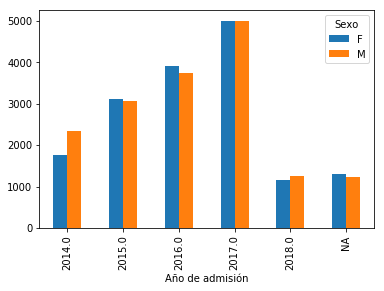

In [7]:
# Peticiones por año y sexo
por_sexo = pd.crosstab(data['Año de admisión'].fillna('NA'), data['Sexo'].fillna('NA'))
por_sexo.plot(kind='bar')
por_sexo.to_excel('por-sexo.xlsx')
print('Detalle:\n', por_sexo)
print('Subtotales:\n', por_sexo.sum())
print('Total:\n', por_sexo.sum().sum())

In [8]:
# Peticiones por departamento y año
por_depto = pd.crosstab(data['Departamento'].fillna('NA'), data['Año de admisión'].apply(str).fillna('NA'))
por_depto.to_excel('por-depto.xlsx')
print('Detalle:\n', por_depto)
print('Subtotales:\n', por_depto.sum())
print('Total:\n', por_depto.sum().sum())

Detalle:
 Año de admisión  2014.0  2015.0  2016.0  2017.0  2018.0   nan
Departamento                                                 
Ahuachapán           25      63      76     117      27    27
Cabañas              25      41      43      53      16    19
Chalatenango         50      49      76      97      46    21
Cuscatlán            81     115      94     165      52    23
La Libertad         774    1000    1377    1666     423   520
La Paz              146     199     159     311      90    42
La Unión             23      25      53      58      19    17
Morazán              16      31      31      40      20    11
NA                  126     190     260     420      72   170
San Miguel          104     108     143     308      88    85
San Salvador       2449    3835    4724    6091    1361  1441
San Vicente          62      86      83      96      36    16
Santa Ana            94     246     325     341      86    80
Sonsonate            66      97     122     129      43    3

In [9]:
# Peticiones por municipio
por_mun = pd.crosstab(data['Municipio'].fillna('NA'), data['Año de admisión'].apply(str).fillna('NA'))
por_mun.to_excel('por-municipio.xlsx')
print('Detalle:\n', por_mun)
print('Subtotales:\n', por_mun.sum())
print('Total:\n', por_mun.sum().sum())

Detalle:
 Año de admisión            2014.0  2015.0  2016.0  2017.0  2018.0  nan
Municipio                                                             
Acajutla                        7       5      11      11       3    4
Agua Caliente                   1       0       4       2       0    1
Aguilares                       7       9      13      16      14    4
Ahuachapán                      9      31      42      65       7   16
Alegría                         3       0       1       7       1    0
Anamorós                        1       2       0       0       0    0
Antiguo Cuscatlán             162     263     460     576     110  174
Apaneca                         0       0       2       3       2    1
Apastepeque                     4       4       7       9       2    2
Apopa                          82     114     120     143      54   21
Arcatao                         0       1       1       4       1    0
Armenia                         8      11      17      11       3  

In [10]:
# Por nivel educativo
data.loc[(data['Nivel educativo'] == 'No especificó su inf. académica'), 'Nivel educativo'] = 'NA'
data.loc[(data['Nivel educativo'] == 'no especificó'), 'Nivel educativo'] = 'NA'
data.loc[(data['Nivel educativo'] == 'Sin educación formal'), 'Nivel educativo'] = '0 - Sin educación formal'
data.loc[(data['Nivel educativo'] == 'Primaria (Hasta sexto grado)'), 'Nivel educativo'] = '1 - Primaria'
data.loc[(data['Nivel educativo'] == 'primaria'), 'Nivel educativo'] = '1 - Primaria'
data.loc[(data['Nivel educativo'] == 'Secundaria (Tercer ciclo)'), 'Nivel educativo'] = '2 - Secundaria'
data.loc[(data['Nivel educativo'] == 'secundaria'), 'Nivel educativo'] = '2 - Secundaria'
data.loc[(data['Nivel educativo'] == 'bachillerato'), 'Nivel educativo'] = '3 - Bachillerato'
data.loc[(data['Nivel educativo'] == 'Bachillerato'), 'Nivel educativo'] = '3 - Bachillerato'
data.loc[(data['Nivel educativo'] == 'Universitario'), 'Nivel educativo'] = '4 - Universitario'
data.loc[(data['Nivel educativo'] == 'universitario'), 'Nivel educativo'] = '4 - Universitario'
data.loc[(data['Nivel educativo'] == 'Postgrado'), 'Nivel educativo'] = '5 - Posgrado'
data.loc[(data['Nivel educativo'] == 'postgrado'), 'Nivel educativo'] = '5 - Posgrado'
por_educ = pd.crosstab(data['Nivel educativo'].fillna('NA'), data['Año de admisión'].apply(str).fillna('NA'))

Detalle:
 Año de admisión           2014.0  2015.0  2016.0  2017.0  2018.0   nan
Nivel educativo                                                       
0 - Sin educación formal       0       0       0      71      68     2
1 - Primaria                 154     267     170     409     178    19
2 - Secundaria               150     296     200     360     135    28
3 - Bachillerato             666     952     972    1371     377   404
4 - Universitario           2633    3853    4696    5464    1205  1572
5 - Posgrado                 310     512     898    1195     165   437
NA                           197     296     720    1134     291    86
Subtotales:
 Año de admisión
2014.0     4110
2015.0     6176
2016.0     7656
2017.0    10004
2018.0     2419
nan        2548
dtype: int64
Total:
 32913


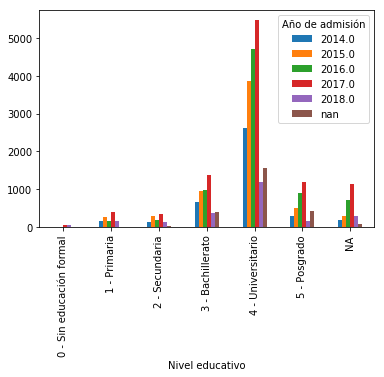

In [11]:
por_educ.plot(kind='bar')
por_educ.to_excel('por-educ.xlsx')
print('Detalle:\n', por_educ)
print('Subtotales:\n', por_educ.sum())
print('Total:\n', por_educ.sum().sum())

In [12]:
# Por institución
por_inst = pd.crosstab(data['Institución'].fillna('NA'), data['Año de admisión'].apply(str).fillna('NA'))
por_inst.to_excel('por-institucion.xlsx')

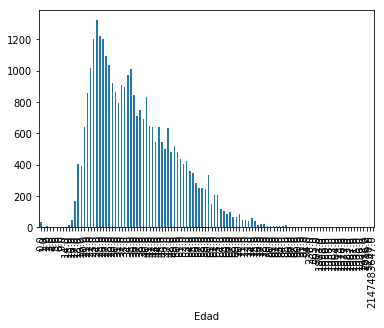

In [13]:
# Por edad
por_edad = data.groupby(['Edad'])['Edad'].count()
por_edad.to_excel('por-edad.xlsx')
por_edad.plot(kind='bar')

In [14]:
edades = [0, 18, 30, 45, 60,100]
freq = np.zeros(len(edades) - 1)
pos = 1
for idx in range(len(por_edad)):
    if pos > len(edades) - 2:
        break
    if idx >= edades[pos]:
        pos += 1
    freq[pos - 1] += por_edad.iloc[idx]
freq

array([ 4784., 12232.,  9432.,  4102.,    87.])

In [32]:
df = pd.DataFrame({'Frecuencia': freq}, index=['[0-18]', '[18-30]', '[30-45]', '[45-60]', '>60'])
df.to_excel('por_rango_edad.xlsx')

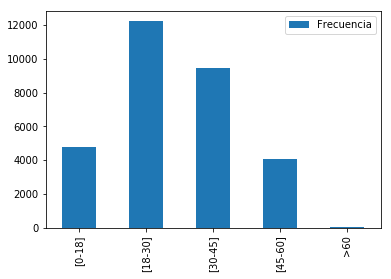

In [30]:
df.plot(kind='bar')

In [31]:
df

,Frecuencia
[0-18],4784.0
[18-30],12232.0
[30-45],9432.0
[45-60],4102.0
>60,87.0
